# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
  In this Investigate a dataset project from Udacity Data Analyst Nanodegree , Im going to assess , clean and explore the
Tmdb movies dataset which contains data about nearly 11000 movies from 1960 to 2015   . the data provided includes budget , revenue , vote_average , cast and other aspects of movies , ranging from qualitative to quantitative variables.

the questions im going to try to answer through this investigation are described below .

___revenue and budget related questions :___
1. what are the top 10 movies associated with the largest revenues ?
2. what are the top 10 movies associated with the largest budgets ?
3. what are the top 10 movies associated with the largest profits ?
4. What are the top 10 movies associated with the lowest revenues ?
5. What are the top 10 movies associated with the lowest budgets ?
6. What are the top 10 movies associated with the lowest profits ?
7. What is the overal evolution of revenue through the years ?
8. What is the overal evolution of budget through the years ?

___runtime related questions :___
9. what are the top 10 longest movies ?
10. what are the top 10 shortest movies ?
11. What is the average runtime ?
12. how is evolution of runtime through the years ? have movies decreased in terms of runtime ? have they increased ?

___genres related questions :___ 
13. what is the distribution of movies per genre ?

___release year related questions :___ 
14. what is the distribution of movies per year ? what is the year associated with the biggest production of movies ? what is the year associated with the smallest production of movies ?

___director related questions :___
15. who directed the biggest number of movies ? Who are the top 5 directors who directed the biggest numbers of movies ?

___Production companies related questions :___
16. what are the top 5 production companies with the biggest number of produced movies ?

___cast related questions :___
17. Top 10 most casted actors/actresses

___Studying the movies with a high vote average___







In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
# Data Wrangling




## Reading the data

In [3]:
#loading data from csv file
df=pd.read_csv('Documents/investigate-a-dataset-template/tmdb-movies.csv')


## Assessing and building intiution

### Printing the Dataset's Dimensions

the dataset consists of 21 columns and 10866 rows with each row representing a movie 

In [4]:
df.shape

(10866, 21)

### Displaying the first few rows of the Dataset

having a look at the first rows of the dataset , each column describes a particular aspect of the movies . for instance, id columns have unique values for each movie . other columns include movie titles , cast , genre , production companies and other general informations as well as columns describing the financial informations such as revenue and budget .

no currency is mentioned in the budget and revenue columns , so im going to assume it's in US dollars .

there are also columns that are irrelevant to our data analysis process such as homepage , tagline , revenue_adj , etc .. Columns like these offer no insights and relevance about the questions im trying to answer , so we will need to drop them in the data cleaning process .

additionally , cast , production_companies and genres cells contain data seperated by '|' character that we will need to remove.

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Displaying the last few rows of the dataset

as you can see , by showing the last few rows in the dataset , it turns out that budget and revenue hold zero as a value , which can 
cause problems if we want to operate on these columns , we will need to drop the rows where revenue and budget are zero .

the following results can suggest that some other values in the dataset can be zero , such as values for runtime , we will need to check the dataset for zero values as well.


In [6]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### Printing a concise summary of the dataset

there seem to be some null values in some columns , particulary in cast column , so we need to drop the rows with Nulls to a better investigation of the dataset.
additionally , release_date is of type object , and as we know, strings appear as objects in Python , so in order to be able to work with them, we are required to convert the dates into datetime format.
datetime is much more convenient to work with especially when extracting and filtering data, operations that we need in our data analysis process to answer the aforementioned questions.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Descriptive statistics of the dataset 

this brief descriptive statistics gives us insights about numeric data in our dataset , for instance , 75% of the movies' average votes fall below 6.6 , while the maximum and minimum vote averages are respectively 9.2 and 1.5.

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Overall distribution of the numeric data 

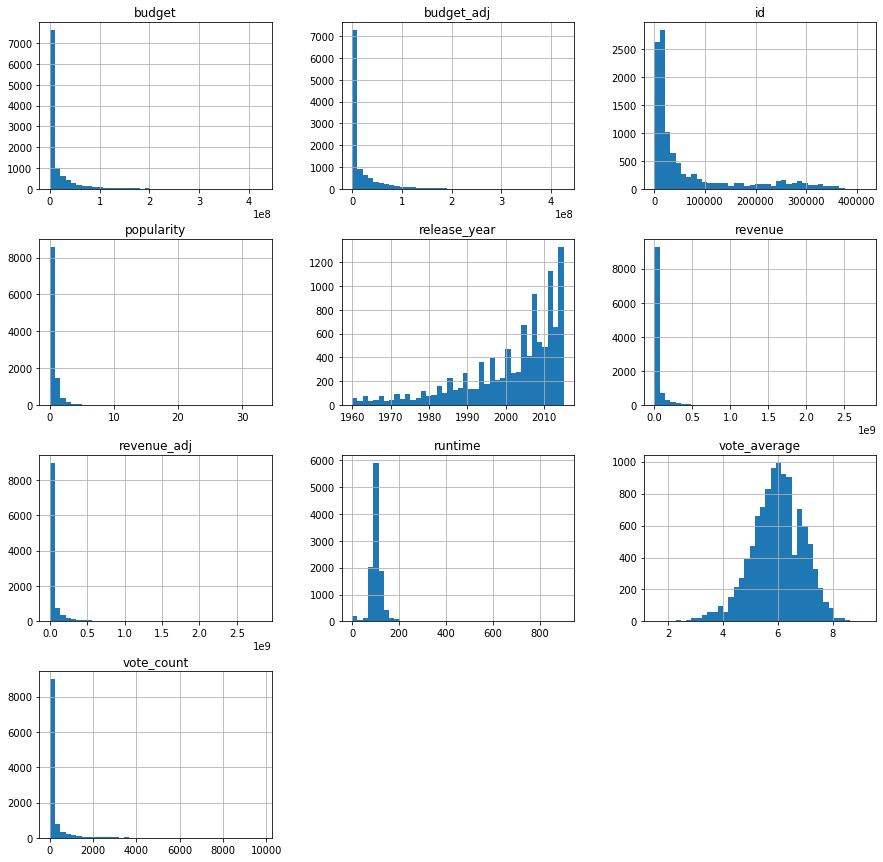

In [9]:
#overall distribution of numeric data 
df.hist(figsize=(15,15) ,bins=40);

Looking at the histograms of our numeric data , in addition to runtime , revenue , budget and vote count have also a lot of zeros as suspected
, we will look at the exact numbers closely in the data cleaning process .

## further investigation and Data cleaning

### deleting unnecessary columns

as mentioned above , some of the columns in the data frame aren't going to be useful in my analysis so im going to drop them 
in order to work only on the columns that are relevant to the questions im trying to answer.
the columns im going to drop are :

-revenue_adj

-budget_adj

-overview

-keywords

-tagline

-homepage

-imdb_id

vote_count

In [10]:
#dropping unnecessary columns 
df.drop(["revenue_adj", "budget_adj" ,"overview","keywords","tagline","homepage", "imdb_id" , "vote_count"  ], axis = 1, inplace = True)

In [11]:
#displaying the dataset after removal of the unnescessary columns
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015


### Checking for duplicates

we want to check for duplicates in our dataset , Im only going to consider duplicated rows , since we can have duplicated movie names 
and other variables.

In [12]:
#checking for duplicated rows
df.duplicated().sum()

1

we have one duplicated row , let's see it !

In [13]:
#displaying the duplicates
df[df.duplicated (keep= False )== True]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,5.0,2010


as you can see above , the rows are identical in every column , sorry , TEKKEN twin , but we can't keep you in the dataset .

In [14]:
#deleting the duplicated row
df.drop_duplicates(inplace=True)

In [15]:
#displaying the shape of the data afer removal
df.shape

(10865, 13)

we have a total of 10865 rows and 14 columns after deleting unnecessary columns and duplicates .

### Checking for negtive values in revenue and budget

In [16]:
#checking for rows with negative revenue values
negative_revenue= df['revenue'] < 0 
df[negative_revenue].shape

(0, 13)

In [17]:
#checking for rows with negative budget values
negative_budget= df['budget'] < 0 
df[negative_budget].shape

(0, 13)

there are zero rows wuth negative revenue and budget values

### Checking for Zeros's in revenue , budget , and runtime

In [18]:
#displaying the number of rows where runtime equals 0
runtime_check= df['runtime'] == 0
df[runtime_check].shape

(31, 13)

In [19]:
#displaying the number rows where budget equals 0
budget_check= df['budget'] == 0 
df[budget_check].shape

(5696, 13)

In [20]:
#displaying the number of rows where revenue equals 0
revenue_check= df['revenue'] == 0 
df[revenue_check].shape

(6016, 13)

it seems that we have a lot of zeros in our columns , especially in budget and revenue , since we're going to answer questions about 
these variables i don't think that replacing them with the mean is the correct thing to do especially that we don't know the reasons behind these values , we will need to drop them.

In [21]:
#storing the index of the rows in question
index_revenue = df[ df['revenue'] == 0 ].index
# Deleting these rows from dataFrame
df.drop(index_revenue , inplace=True)
#storing the index of the rows in question
index_budget = df[ df['budget'] == 0 ].index
# Deleting these rows from dataFrame
df.drop(index_budget , inplace=True)


### Deleting nulls from the dataset 

we will delete all nulls present in the dataset , let's have a look at the dataset info again.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   int64  
 3   revenue               3854 non-null   int64  
 4   original_title        3854 non-null   object 
 5   cast                  3850 non-null   object 
 6   director              3853 non-null   object 
 7   runtime               3854 non-null   int64  
 8   genres                3854 non-null   object 
 9   production_companies  3808 non-null   object 
 10  release_date          3854 non-null   object 
 11  vote_average          3854 non-null   float64
 12  release_year          3854 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 421.5+ KB


as you can see , revenue , budget and runtime now have null values , we will drop all the values including cast,production companies , genres , director etc..

In [23]:
#dropping nulls from the dataset
df.dropna(how='any', inplace=True)

In [24]:
#looking at the info to check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   budget                3805 non-null   int64  
 3   revenue               3805 non-null   int64  
 4   original_title        3805 non-null   object 
 5   cast                  3805 non-null   object 
 6   director              3805 non-null   object 
 7   runtime               3805 non-null   int64  
 8   genres                3805 non-null   object 
 9   production_companies  3805 non-null   object 
 10  release_date          3805 non-null   object 
 11  vote_average          3805 non-null   float64
 12  release_year          3805 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 416.2+ KB


our new dataset now includes a total of 3805 movies , we can notice here that revenue, budget and runtime are of type float , we will need to change their format to int as well as released_date to datetime.

### Changing variables types to the adequate formats

In [25]:
#changing release date to datetime
df.release_date = pd.to_datetime(df['release_date'])

let's check the changes !

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   budget                3805 non-null   int64         
 3   revenue               3805 non-null   int64         
 4   original_title        3805 non-null   object        
 5   cast                  3805 non-null   object        
 6   director              3805 non-null   object        
 7   runtime               3805 non-null   int64         
 8   genres                3805 non-null   object        
 9   production_companies  3805 non-null   object        
 10  release_date          3805 non-null   datetime64[ns]
 11  vote_average          3805 non-null   float64       
 12  release_year          3805 non-null   int64         
dtypes: datetime64[ns]

In [27]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015


as you can see above , revenue , budget and released_date are now of types int , int and datetime .

### Final Check of the data

In [28]:
#checking for duplicated rows in the dataset
df.duplicated().sum()

0

In [29]:
#checking for nulls in the dataset
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

Our dataset contains no duplicates and no null values , we're ready to move to exploratory analysis !

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned your data, we're ready to move on to the exploratory data analysis process. 
### Revenue and Budget related Questions

#### 1. what are the top 10 movies associated with the largest revenues ?


to answer the top 10 questions , we need to create two functions that return the top 10 rows with largest and smallest values .

In [30]:
#creating a function that returns the top 10 largest values
def top10(column) :
    top10_values=df.nlargest(10,column)
    return top10_values[['original_title','director','release_year',column]]

In [31]:
#calling the top 10 function to return the top 10 movies with largest revenue
largest_revenues=top10('revenue')
print(largest_revenues.to_string(index=False))

                               original_title                 director  release_year     revenue
                                       Avatar            James Cameron          2009  2781505847
                 Star Wars: The Force Awakens              J.J. Abrams          2015  2068178225
                                      Titanic            James Cameron          1997  1845034188
                                 The Avengers              Joss Whedon          2012  1519557910
                               Jurassic World          Colin Trevorrow          2015  1513528810
                                    Furious 7                James Wan          2015  1506249360
                      Avengers: Age of Ultron              Joss Whedon          2015  1405035767
 Harry Potter and the Deathly Hallows: Part 2              David Yates          2011  1327817822
                                       Frozen  Chris Buck|Jennifer Lee          2013  1274219009
                              

as we see above , the movie with the highest revenue is Avatar with a total of 2781505847 US Dollars , released in 2009 and directed by James Cameron , followed by Star Wars: The Force Awakens and Titanic.

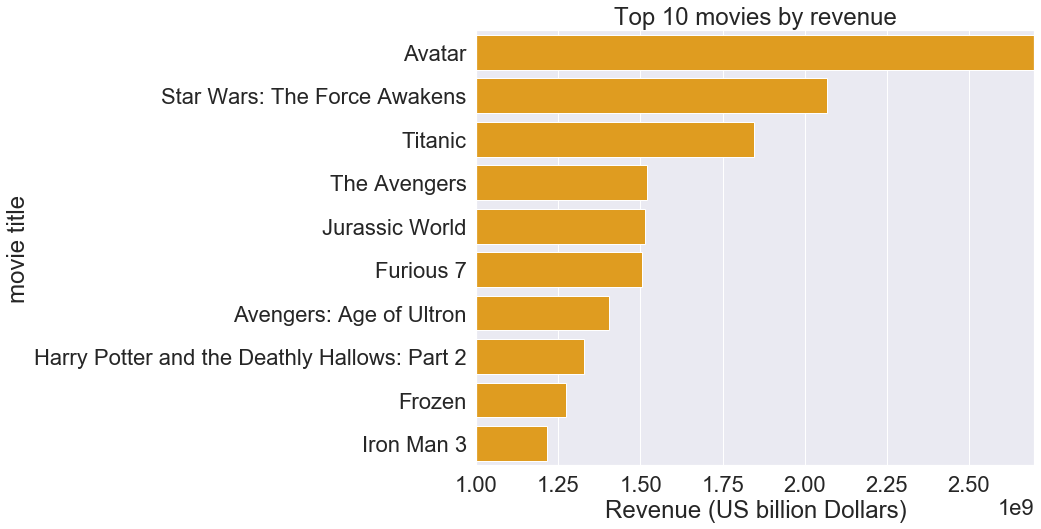

In [70]:
#plotting the results into horizontal bar chart
#setting the style
sns.set(style="darkgrid");
#setting the font size
sns.set(font_scale=2);
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(10, 8));
axes = sns.barplot(x='revenue', y='original_title', data=largest_revenues , color='orange');
#labeling the axes
axes.set(xlim=(1000000000,	2700000000), ylabel="movie title", xlabel="Revenue (US billion Dollars)");
#setting a title for the plot
axes.set_title('Top 10 movies by revenue');


#### what are the top 10 movies associated with the largest budgets ?

In [33]:
#calling the top 10 function to return the top 10 movies with largest budget
largest_budgets=top10('budget')
print(largest_budgets.to_string(index=False))

                              original_title                   director  release_year     budget
                           The Warrior's Way                 Sngmoo Lee          2010  425000000
 Pirates of the Caribbean: On Stranger Tides               Rob Marshall          2011  380000000
    Pirates of the Caribbean: At World's End             Gore Verbinski          2007  300000000
                     Avengers: Age of Ultron                Joss Whedon          2015  280000000
                            Superman Returns               Bryan Singer          2006  270000000
                                     Tangled  Nathan Greno|Byron Howard          2010  260000000
                                 John Carter             Andrew Stanton          2012  260000000
                                Spider-Man 3                  Sam Raimi          2007  258000000
                             The Lone Ranger             Gore Verbinski          2013  255000000
   The Hobbit: The Battle of t

according to the output above , it seems that The Warrior's way is the movie with the largest budget of 425 million , released in 2010 and directed by  Sngmoo Lee , followed by two movies from the pirates of the Caribbean franchise ,  Pirates of the Caribbean: On Stranger Tides with a budget of 380 million and  Pirates of the Caribbean: At World's End with a budget of 300 million .

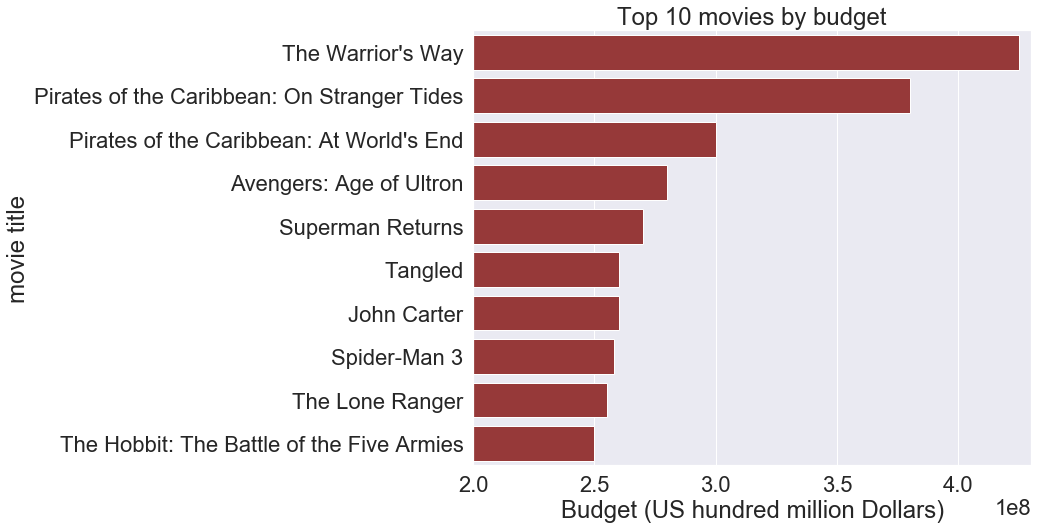

In [67]:
#plotting the results into horizontal bar chart
#setting the style
sns.set(style="darkgrid");
#setting the font size
sns.set(font_scale=2);
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(10, 8));
axes = sns.barplot(x='budget', y='original_title', data=largest_budgets , color='brown');
#labeling the axes
axes.set(xlim=(200000000,	430000000), ylabel="movie title", xlabel="Budget (US hundred million Dollars)");
#setting a title for the plot
axes.set_title('Top 10 movies by budget');

#### what are the top 10 movies associated with the largest profits ?

in order to know the top 10 movies associated with profit , whether largest or lowest , we will create a column in which we calculate and store the profit for each movie.

In [35]:
#creating a new column and substracting budget from revenue
df['profit'] = df['revenue']-df['budget']

In [36]:
#taking a look at the new column
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1363528810


In [37]:
#calling the top 10 function to return the top 10 movies with largest profit
largest_profits=top10('profit')
print(largest_profits.to_string(index=False))

                               original_title                 director  release_year      profit
                                       Avatar            James Cameron          2009  2544505847
                 Star Wars: The Force Awakens              J.J. Abrams          2015  1868178225
                                      Titanic            James Cameron          1997  1645034188
                               Jurassic World          Colin Trevorrow          2015  1363528810
                                    Furious 7                James Wan          2015  1316249360
                                 The Avengers              Joss Whedon          2012  1299557910
 Harry Potter and the Deathly Hallows: Part 2              David Yates          2011  1202817822
                      Avengers: Age of Ultron              Joss Whedon          2015  1125035767
                                       Frozen  Chris Buck|Jennifer Lee          2013  1124219009
                              

interestingly ,we can spot the same movies in our top10 movies by revenue results , Avatar remains the movie with the largest profit , same for Star Wars: The Force Awakens and Titanic that follow , which is pretty expected as the profit is calculated by subtracting cost or budget from revenue , the majority of these movies made billions after all ! 

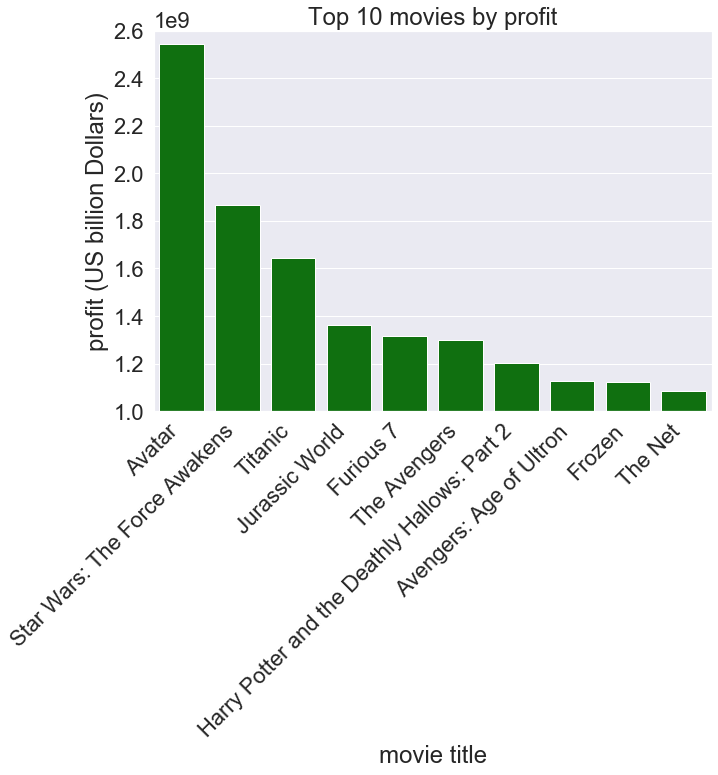

In [66]:
#plotting the results into vertical bar chart
#setting the style
sns.set(style="darkgrid");
#setting the font size
sns.set(font_scale=2);
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(10, 7));
axes = sns.barplot(x='original_title', y='profit', data=largest_profits , color='green');
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#labeling the axes
axes.set(ylim=(1000000000,	2600000000), ylabel="profit (US billion Dollars)", xlabel="movie title");
#setting a title for the plot
axes.set_title('Top 10 movies by profit');

#### What are the top 10 movies associated with the lowest revenues ?

to answer the questions about the top 10 movies with the smallest revenues , budgets , and profits , as well as further top 10 questions , we're gonna implement a function that calculates the top10 movies related to the smallest values and call it each time we need it to answer a question related to top 10 smallest values.

In [39]:
#creating a function (reverse top10) that returns the top 10 smallest values
def rtop10(column) :
    top10_values=df.nsmallest(10,column)
    return top10_values[['original_title','director','release_year',column]]

In [40]:
#calling the reverse top 10 function to return the top 10 movies with smallest revenues
lowest_revenues=rtop10('revenue')
print(lowest_revenues.to_string(index=False))

           original_title             director  release_year  revenue
          Shattered Glass            Billy Ray          2003        2
                 Mallrats          Kevin Smith          1995        2
              Kid's Story  Shinichiro Watanabe          2003        5
        Bordello of Blood        Gilbert Adler          1996        5
  Never Talk to Strangers           Peter Hall          1995        6
 The House of the Spirits         Bille August          1993        6
             Hross Ã­ oss  Benedikt Erlingsson          2013       11
      Tales from the Hood       Rusty Cundieff          1995       11
                 F.I.S.T.       Norman Jewison          1978       11
          Chasing Liberty          Andy Cadiff          2004       12


according to the analysis , the movie with the lowest revenue is Shattered Glass , with a revenue of 2 dollars , as seen above , the top ten movies with the least revenues are of less than 12 dollars which doesn't make sense to me , ___Upon further research , it turned out that Shattered glass actually made 	2.9 million  , Mallrats  , too  , made 2.1  million which tells me that the data is incorrect due to probable typos when entering data values___ , I would say that this is pretty common , since we're basically looking at relatively older movies in comparison to those who have the largest revenues , profits and revenues , we can expect things like this to happen , so the results are not really accurate , we can expect to see this problem with budgets and profits as well .

#### What are the top 10 movies associated with the lowest budgets ?


In [41]:
#calling the reverse top 10 function to return the top 10 movies with the lowest budgets
lowest_revenues=rtop10('budget')
print(lowest_revenues.to_string(index=False))

                     original_title             director  release_year  budget
                       Lost & Found         Jeff Pollack          1999       1
            Love, Wedding, Marriage      Dermot Mulroney          2011       1
                       Death Wish 2       Michael Winner          1982       2
                                Boy        Taika Waititi          2010       3
 Tales from the Darkside: The Movie        John Harrison          1990       3
                Tales from the Hood       Rusty Cundieff          1995       6
                       The Prophecy        Gregory Widen          1995       8
 National Lampoon's Loaded Weapon 1        Gene Quintano          1993       8
                        Kid's Story  Shinichiro Watanabe          2003      10
                       Hross Ã­ oss  Benedikt Erlingsson          2013      10


Similarly , the movie with the lowest budget here is  Lost & Found  , with a budget of 1 dollar , as seen above , the top ten movies with the least budgets are of less or equal to 10 dollars , which again , doesn't make sense , ___Lost & Found is of actually Ten thousand dollars budget___ , so all the following budgets are expected to be greater than ten thousand , National Lampoon's Loaded Weapon 1 , for example , has a  budget of 8.2 million . 

#### What are the top 10 movies associated with the lowest profits ?

In [42]:
#calling the reverse top 10 function to return the top 10 movies with the lowest profits
lowest_revenues=rtop10('profit')
print(lowest_revenues.to_string(index=False))

               original_title                    director  release_year     profit
            The Warrior's Way                  Sngmoo Lee          2010 -413912431
              The Lone Ranger              Gore Verbinski          2013 -165710090
                    The Alamo            John Lee Hancock          2004 -119180039
              Mars Needs Moms                 Simon Wells          2011 -111007242
                 Brother Bear  Aaron Blaise|Robert Walker          2003  -99999750
             The 13th Warrior              John McTiernan          1999  -98301101
 The Adventures of Pluto Nash               Ron Underwood          2002  -92896027
              Charlotte's Web                 Gary Winick          2006  -84999856
                 Flushed Away       David Bowers|Sam Fell          2006  -84540684
                    Australia                Baz Luhrmann          2008  -80445998


according to our results , the warrior's way is of profit of  The Warrior's Way -413912431 , while profits can indeed be negative , indicating that budget is greater than revenue , having big negative numbers indicates that there are some really incorrect low values in either revenue or budget which I believed messed up our results ,in fact , the lone ranger needed 	225–250 million to be produced while made 260.5 million , the profit is negative but still not as large as the number above , even though the Warrior's Way is shown to be the movie with the least profit , I highly believe it is not the case and once again , due to incorrect data entries we can't know for sure the exact results .

#### What is the overall evolution of revenue through the years ? 

In our track of the evolution of a particular data variable over the years , I decided to do it based on the moving average , in Order to outline the long time changes and overlook fluctuations .

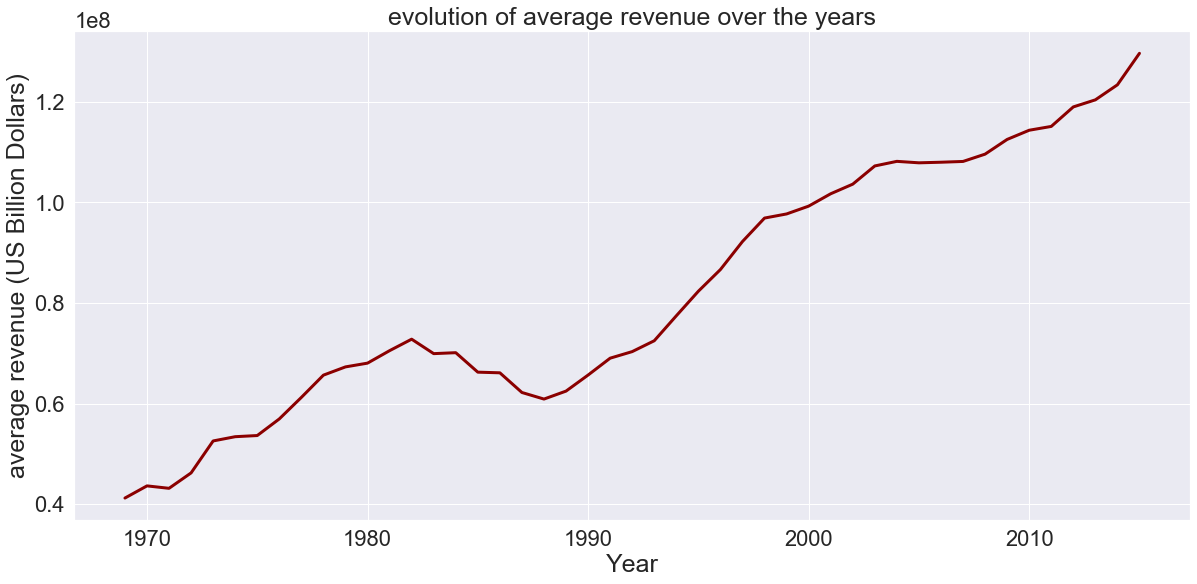

In [43]:
#grouping release year and revenue and calculating the mean
average_revenue=df.groupby('release_year')['revenue'].mean()
#calculating the moving average 
moving_average_revenue=average_revenue.rolling(window=10).mean()
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sns.lineplot(data=moving_average_revenue , color='DarkRed', linewidth=3)
#setting the plot labels and title
plt.title('evolution of average revenue over the years', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
plt.ylabel('average revenue (US Billion Dollars)', fontsize = 25);

As I expected , Overall, average movie revenues are increasing over the years . the plot shows a decrease in the average revenue in the 80's that went up from there to register slight decreases from time to time reaching 2015 .

also , the average revenue for movies from 1970 to 1990 never reached a billion dollars , which is pretty expected as we only saw Titanic in our top 10 revenues analysis from the 90's that made nearly two billion , as you can see , the revenue started to increase from the early 90's in our plot which I believe a result of Titanic's revenue , even though our dataset conains nearly 4000 movies now , these results may not be very accurate but it's safe to say that the rapid obvious increase of the average revenue of movies produced in the 21st century can be related to technology and art advancement and innovations , including cameras , computers , cinematography , special effects etc.. cultural and lifestyle change too , have their fair share of this increase in revenue , entertainment in our days is one of the biggest markets as well as one of our passtimes !

#### What is the overal evolution of budget through the years ?

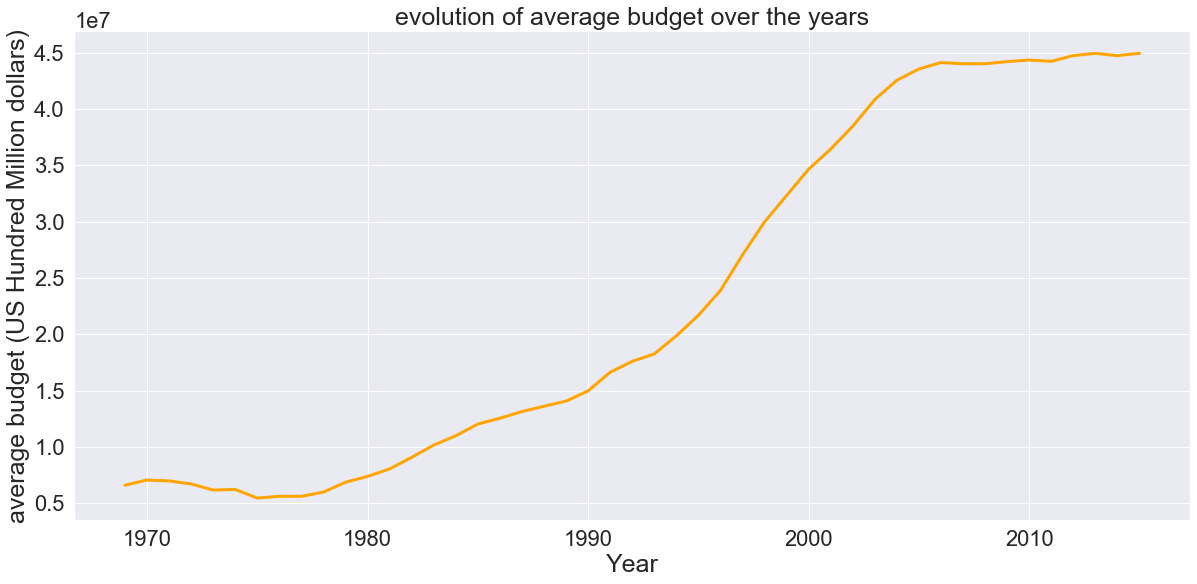

In [44]:
#grouping release year and budget and calculating the mean
average_budget=df.groupby('release_year')['budget'].mean()
#calculating the moving average
moving_average_budget=average_budget.rolling(window=10).mean()
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sns.lineplot(data=moving_average_budget , color='Orange', linewidth=3)
#setting the plot labels and title
plt.title('evolution of average budget over the years', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
plt.ylabel('average budget (US Hundred Million dollars)', fontsize = 25);

Budget too , seems to be increasing over the years , but this time starting from the mid 70's to increase steadily until nearly 2007/2008 to register a slight , barely noticeable increase over the next 10 years as we're moving average by 10 years

### runtime related questions :

#### what are the top 10 longest movies ?

In [45]:
#calling the top 10 function to return the top 10 movies with longest runtime
longest_runtime=top10('runtime')
print(longest_runtime.to_string(index=False))

                                original_title                                                director  release_year  runtime
                                        Carlos                                         Olivier Assayas          2010      338
                                     Cleopatra  Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F. Zanuck          1963      248
                                 Heaven's Gate                                          Michael Cimino          1980      219
                            Lawrence of Arabia                                              David Lean          1962      216
                             Gods and Generals                                       Ronald F. Maxwell          2003      214
                                  Jodhaa Akbar                                      Ashutosh Gowariker          2008      213
                                     Malcolm X                                               Spike Lee          1992  

the longest movie in our dataset is titled Carlos , directed by Olivier Assayas and released in 2010,  with a runtime of 338 minutes , these 10 movies are all of a runtime greater than 3 hours , I thought the Godfather is the longest movie i've seen , turns out there are longer movies, interesting !

#### what are the top 10 shortest movies ?

In [46]:
#calling the top 10 function to return the top 10 movies with longest runtime
shortest_runtime=rtop10('runtime')
print(shortest_runtime[['original_title','runtime','release_year']].to_string(index=False))

            original_title  runtime  release_year
               Kid's Story       15          2003
  Mickey's Christmas Carol       26          1983
           Winnie the Pooh       63          2011
                   9 Songs       66          2004
      The Land Before Time       69          1988
      Return to Never Land       72          2002
         The Jungle Book 2       72          2003
       The Powerpuff Girls       73          2002
             Fantasia 2000       74          1999
 The Great Mouse Detective       74          1986


it seems like the shortest movie in our dataset is kid's story of a runtime of 15 minutes released in 2003 , which i assume is a short movie ,
followed by Mickey's Christmas Carol of a runtime of 26 minutes , the other movies last more than one hour each .

#### What is the average runtime ?

we want to know the average runtime,for this , im going to calculate the mean of the values in runtime column .

In [47]:
#calculating the mean in runtime
df.runtime.mean()

109.35111695137977

as seen in the output , the average runtime for movies in our dataset is 109 minutes ,  one hour and 49 minutes .

#### how is the evolution of runtime through the years ? have movies decreased in terms of runtime ? have they increased ?

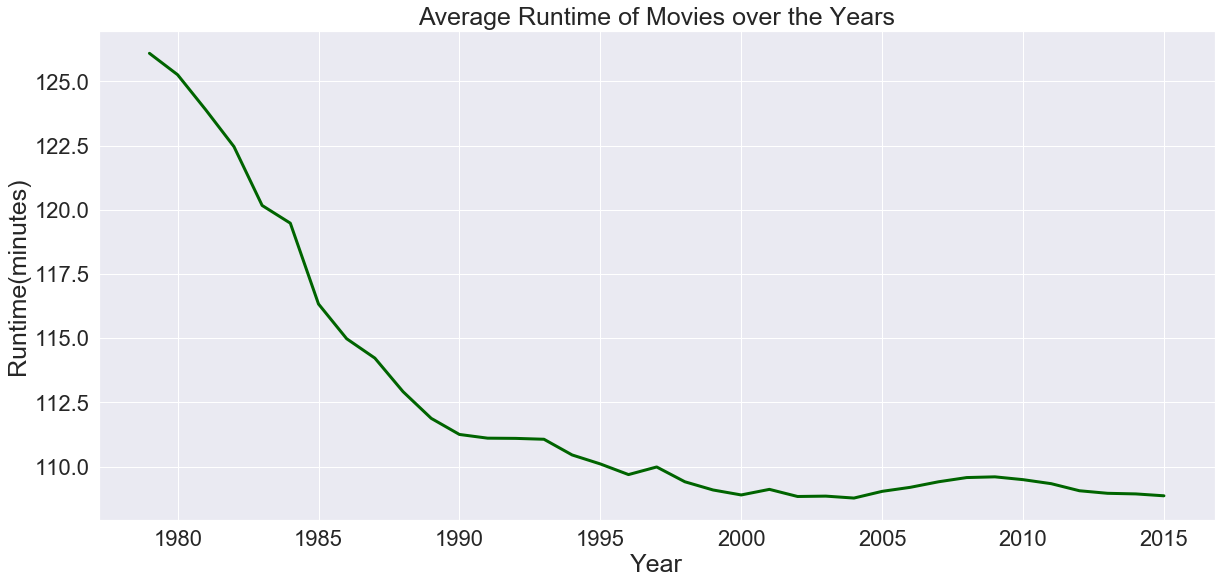

In [48]:
#grouping release year and runtime and calculating the mean
average_runtime=df.groupby('release_year')['runtime'].mean()
#calculating the moving average
moving_average_runtime=average_runtime.rolling(window=20).mean()
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sns.lineplot(data=moving_average_runtime ,color='DarkGreen', linewidth=3)
#setting the plot labels and title
plt.title('Average Runtime of Movies over the Years', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Runtime(minutes)', fontsize = 25);


As I expected , Runtime is decreasing over the years , the plot shows a steady general decrease from 1980 to 2015 where it reached the mean , nearly 109 minutes , which is pretty reasonable , long films tend to be boring and time consuming , not to mention costy ..

### genres related questions :

#### what is the distribution of movies per genre ?

remember that cast , director , production companies and genres values were seperated by an '|' ? , well if we want to work on them, we might as well seperate them , in the following cell I have created a get_count function that takes as paramters a dataframe and a column , turns the column into string , seperate the different row cells by the same seperator '|' , splits the data and converts it to a pandas series , resulting in seperate values that can be counted later on using value_counts , this is going to help us in the upcoming questions related to cast , director , production companies and genres .

In [49]:
#dataf :dataframe , column : the column in question 
def get_count(dataf,column):
    # Converting the dataframe column to string 
    data=dataf[column].str
    #seperating it by  '|'
    data=data.cat(sep='|')
    # Splitting the data by the same seperator |' to have distinct values
    data=data.split('|')
    #storing the resulting data into a pandas series
    data = pd.Series(data)
    #calculating the count of the values in the column in question
    data_count = data.value_counts()
    return data_count

In [50]:
#calling get count to count the distibution pf the movies per genre
genre_distribution=get_count(df,"genres")
genre_distribution


Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

as shown in the results , Drama is the genre with the most movie count with 1729 under this category, notice that the sum of the values doesn't result in the number of the movies in the dataset , that's because a movie can fall under many genres , the results above show that the movies are more leaned to drama , followed by comedy and thriller 

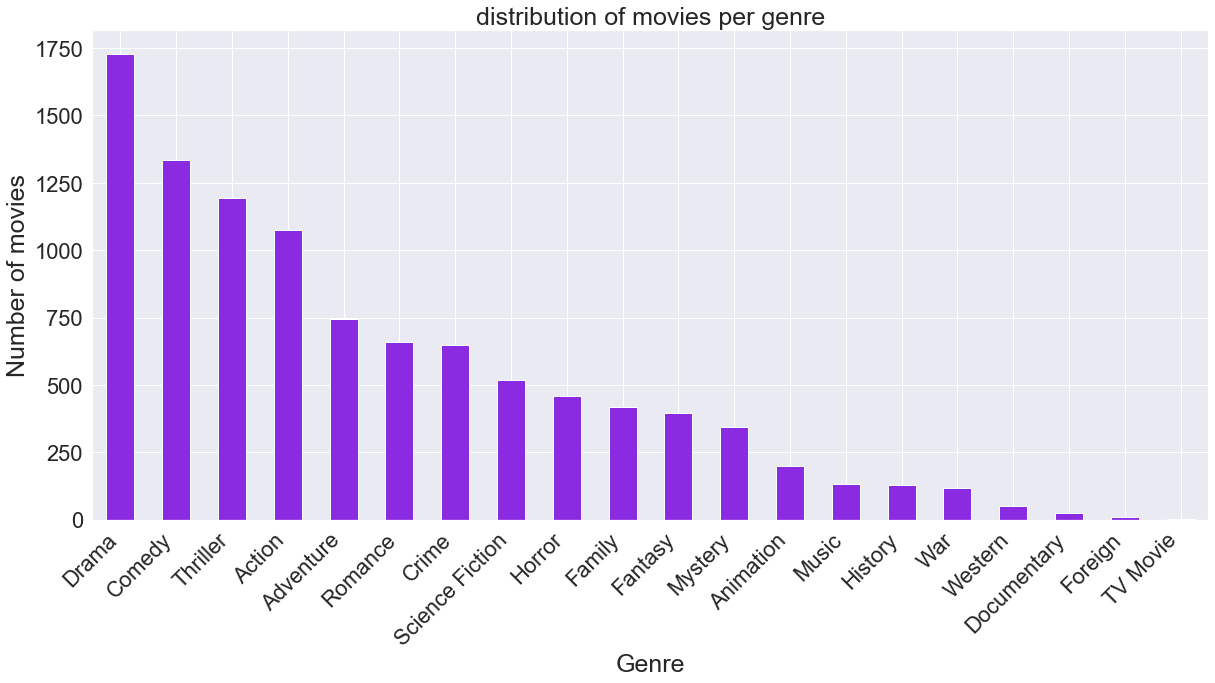

In [71]:
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 9));
genre_distribution.plot(kind='bar' , color='blueviolet');
#rotating the labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
#setting the plot's labels and title
plt.title('distribution of movies per genre', fontsize = 25)
plt.xlabel('Genre', fontsize = 25)
plt.ylabel('Number of movies', fontsize = 25);

### release year related questions 

#### what is the distribution of movies per year ? what is the year associated with the biggest production of movies ? what is the year associated with the smallest production of movies ?

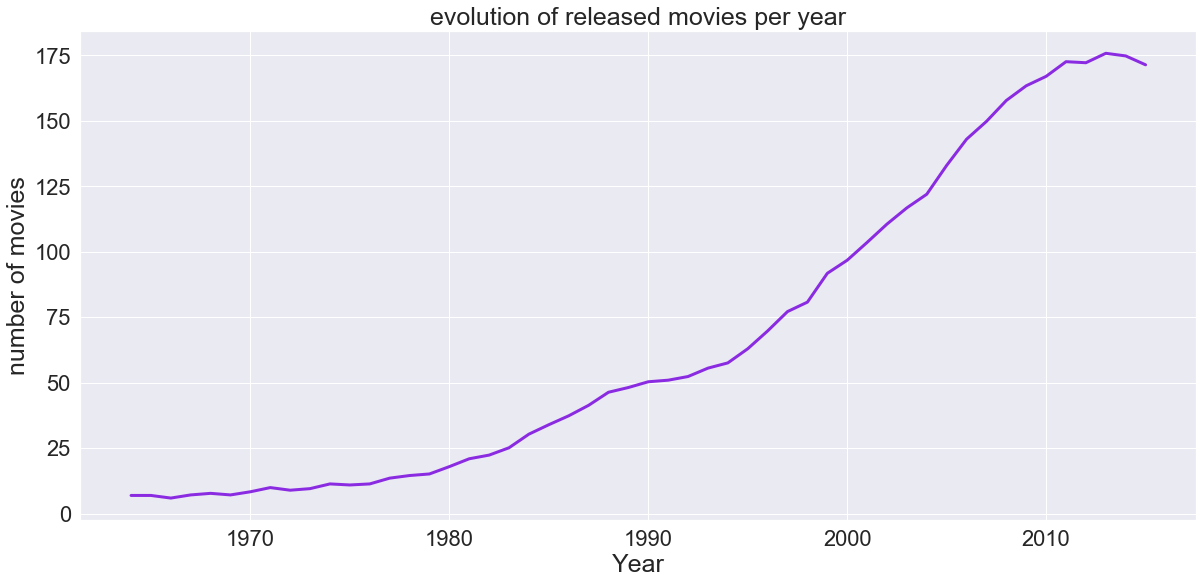

In [52]:
#grouping release year and original title and calculating the count
movie_count=df.groupby('release_year')['original_title'].count()
#calculating the moving average
movie_count=movie_count.rolling(window=5).mean()
#setting the style
sns.set_style("darkgrid")
#setting the plot axes and plotting the data
plt.figure(figsize=(20,9))
sns.lineplot(data=movie_count ,color='blueviolet', linewidth=3)
#setting the plot labels and title
plt.title('evolution of released movies per year', fontsize = 25)
plt.xlabel('Year', fontsize = 25)
plt.ylabel('number of movies', fontsize = 25);

movies appear to be increasing over the years , and in the long run , from the plot , we can't really guess the exact year with the biggest production of movies but it is certainly after 2010.

In [53]:
#calculating the movie count for each year and displaying the year with the biggest number of movies
movie_count=df['release_year'].value_counts()
movie_count.head(1)


2011    196
Name: release_year, dtype: int64

as we predicted , 2011 is the year with the biggest movie release , with a total of 196 movies.

In [54]:
#calculating the movie count for each year and displaying the year with the smallest number of movies
movie_count=df['release_year'].value_counts()
movie_count.tail(1)

1969    4
Name: release_year, dtype: int64

1969 , on the other hand , is the year with the least movie count , with a total of 4 movies .

### director related questions :

### who directed the biggest number of movies ? Who are the top 5 directors who directed the biggest numbers of movies ?

In [55]:
#calculating the movie count for each director and displaying the top 10 directors with the biggest number of movies
directors=df['director'].value_counts()
directors.head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Robert Zemeckis      15
Renny Harlin         15
Brian De Palma       15
Name: director, dtype: int64

Steve Spielberg , tops our list with 27 directed movies , followed by Clint Eastwood and Ridley Scott , 24 , 21 movies for each .

### Production companies related questions :

#### what are the top 5 production companies with the biggest number of produced movies ?

In [56]:
#calculating the movie count for each production company and displaying the top 5 production companies
#with the biggest number of movies
#calling get_count function 
production_companies_count=get_count(df,"production_companies")
production_companies_count.head(5)

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

Universal Pictures tops our list with a total of 329 released movies , followed by Warner Bros and Paramount Pictures having produced respectively 324 and 270 movies each.

### cast related questions :



#### Top 10 most casted actors/actresses

In [57]:
#calculating the movie count for each actor  and displaying the top 10 actors/actresses with the biggest number of movies
#calling get_count function 
cast_count=get_count(df,"cast")
cast_count.head(10)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
Johnny Depp          35
Harrison Ford        34
Brad Pitt            34
Morgan Freeman       34
Tom Hanks            34
dtype: int64

Robert De Niro takes the number one spot with 52 movies , followed by Bruce Willis , 46 movies and Samuel L. Jackson ,44 movies . the top 10 actors are all male , upon further research on Gender distributio ofn lead actors in films , in 2019, it was found that 44.1 percent of lead actors in films that year were female, up by more than ten percent in just two years which indicates that the percentage of women was indeed lower for the years before 2019 , which can explain these results as our dataset contains films up to 2015 only .

### Studying the movies with a high vote average

7 is a very good rating for a movie , I was wondering what insights we would see if we work on movies with specific aspects , in the following , we're going to explore movies with a vote average of 7 or greater , let's see what will we find ! 

In [58]:
#taking a look at a summary statistics of vote_average column 
df["vote_average"].describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

for our dataset , the average vote is 6.17 , we're gonna work on movies with a vote of above the average .

In [59]:
#selecting rows from the dataset that have a vote average equal to or greater than 7
above_average_rating=df[df['vote_average']>= 7 ]
above_average_rating.shape

(627, 14)

there are 627 movies with a vote_average equal to or greater than 7.

### production companies behind movies with an above average vote 

In [60]:
#calling get count function and displaying  the top 5 production companies
get_count(above_average_rating,"production_companies").head(5)

Warner Bros.                              77
Universal Pictures                        56
Paramount Pictures                        42
Twentieth Century Fox Film Corporation    34
Walt Disney Pictures                      29
dtype: int64

interestingly , Universal Pictures isn't the one with the most produced movies with a rating higher than the vote average , Warner Bros. takes the number one spot with 77 movies 

### Cast behind movies with an above average vote

In [61]:
#calling get count function and displaying  the top 10 actors/actresses
av_cast=get_count(above_average_rating,"cast")
av_cast.head(10)

Tom Hanks            16
Robert De Niro       15
Brad Pitt            13
Samuel L. Jackson    12
Denzel Washington    11
Leonardo DiCaprio    11
Al Pacino            11
Mark Ruffalo         10
Matt Damon           10
Harrison Ford        10
dtype: int64

more interesting results ! Tom Hanks is the most starred actor in these movies with a total of 16 movies , Brad Pitt , too , 3rd in this list , making his way from the bottom of our top10 most starred actors listing , notice the changes compared to our previous list ! there are even new names in it such as Leonardo DiCaprio !

### Directors behind movies with an above average vote

In [62]:
#displaying  the top 10 directors 
av_directors=above_average_rating['director'].value_counts()
av_directors.head(10)

Steven Spielberg     12
Martin Scorsese      10
David Fincher         8
Quentin Tarantino     8
Clint Eastwood        7
Christopher Nolan     7
Ridley Scott          7
Stanley Kubrick       6
Joel Coen             6
Peter Jackson         6
Name: director, dtype: int64

More surprising results ! Quentin Tarantino directed 8 movies , all of them with a rating equals or above 7 , what's interesting is that Quentin Tarantino decided to only make 10 movies in his entire career , now 8 of them are already highly rated ! notice that he didn't make it to the previous top 10 list for his small number of movies compared to other directors but now he's taking the top 3 position ! we can also spot new names in this list and the absence of others such as Woody Allen . Steven Spielberg , remains in his top 1 position , followed by Martin Scorsese .

### Genres with movies with an above average vote

In [63]:
#displaying the distribution of movies per genre
av_genres=get_count(above_average_rating,"genres")
av_genres

Drama              398
Thriller           156
Comedy             142
Action             135
Crime              131
Adventure          115
Romance             92
Science Fiction     69
Family              65
Fantasy             63
Mystery             56
Animation           46
War                 37
History             36
Horror              28
Music               26
Western             17
Documentary         11
Foreign              2
dtype: int64

what's interesing about this new distribution compared to the previous one is that Comedy , previously in the top 2 position is now in the 3rd spot , dominated by Thriller with 156 movies following Drama in the top with 398 movies.

In [64]:
#a final statistical description of the movies
above_average_rating.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit
count,627.000000,627.000000,6.270000e+02,6.270000e+02,627.000000,627.000000,627.000000,6.270000e+02
mean,42505.344498,2.232726,3.798602e+07,1.847632e+08,121.017544,7.320574,1998.092504,1.467772e+08
std,77902.785792,2.497667,5.009308e+07,2.884736e+08,24.527575,0.284938,14.456867,2.508718e+08
min,11.000000,0.017708,3.000000e+00,1.300000e+01,26.000000,7.000000,1960.000000,-4.684070e+07
25%,762.500000,0.764212,6.500000e+06,2.701434e+07,103.000000,7.100000,1989.000000,1.297847e+07
50%,8363.000000,1.459821,1.800000e+07,7.144125e+07,118.000000,7.300000,2002.000000,5.107614e+07
75%,36621.000000,2.809910,4.750000e+07,2.056246e+08,134.000000,7.500000,2010.000000,1.616146e+08
max,333352.000000,28.419936,2.800000e+08,2.781506e+09,216.000000,8.400000,2015.000000,2.544506e+09


#### the average runtime for these movies 

as we can see above , the average runtime for these movies is longer than the global average of the dataset , wih 121 minutes , two hours ! compared to 109 minutes ! 

<a id='conclusions'></a>
## Conclusions 
In my data analysis process , I tried answering some of the numerous questions that I had in mind while exploring the dataset , combined with my passion for cinema and movies , this project was entertaining and beneficial !

some of the answers i found were that runtime is decreasing over the years , while budget and revenue are increasing , drama is the genre with the largest movie count ,and Avatar is the most profiteable movie.

i would like to conclude on movies with a vote average equals or greater than 7 :
for these movies , the frequent directors were Steven Spielberg , Martin Scorsese and Quentin Tarantino , while the dominant genres are drama and thriller , Cast on the other hand include the well known stars Tom Hanks , Robert De Niro and Brad Pitt . these movies are produced mostly by Warner Bros. , Universal Pictures and Paramount Pictures ! 
and while we can have movies with a good  rating that doesn't respect the mentioned criterias , it's safe to say that there are obvious contributions to these highly rated movies.
## Limitations 
the results outlined are limited to the 3805 i investigated after data cleaning , which is nearly the 30% of the dataset , for instance , there were wrong values in budget and revenue that generated some wrong profit calculations , as well as in moving averages where some values are null so they weren't included in the plots  .
we should also know that the results are only specific to the 3805 movies that are in the dataset , for example , the numbers of movies in cast count , director count and genre count aren't the real numbers , Steven Spielberg directed 161 movies , per say , additionally , the movies are only from 1960 to 2015 , there can be movies who generated more profit than Avatar , Avengers : EndGame , for example .
